In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
liver=pd.read_csv(r"../liverpool_liver/Estimated_AA_neh_numbers_liverpool_liver_.csv")
liver=liver.dropna()
liver=liver.sort_values(by="Tritium")
print(liver.shape)
liver['symbol']=[x.split('(')[1].replace(')','') for x in liver.AA_name]
# liver.head(20)

(20, 8)


In [3]:
heart=pd.read_csv(r"../liverpool_heart/Estimated_AA_neh_numbers_liverpool_heart_.csv")
heart=heart.dropna()
heart=heart.sort_values(by="Tritium")
print(heart.shape)
heart['symbol']=[x.split('(')[1].replace(')','') for x in heart.AA_name]
# heart.head(20)

(20, 8)


In [4]:
kidney=pd.read_csv(r"../liverpool_kidney/Estimated_AA_neh_numbers_liverpool_kidney_.csv")
kidney=kidney.dropna()
kidney=kidney.sort_values(by="Tritium")
print(kidney.shape)
kidney['symbol']=[x.split('(')[1].replace(')','') for x in kidney.AA_name]
# heart.head(20)

(20, 8)


In [5]:
# merged=pd.merge(left=liver,right=heart,on=['AA_name', 'Tritium','symbol'],suffixes=['_lv','_hr'])
# merged.columns

In [6]:
merged=pd.merge(left=liver,right=heart,on=['AA_name', 'Tritium','symbol'],suffixes=['_lv','_hr'])
merged=pd.merge(left=merged,right=kidney,
                on=['AA_name', 'Tritium','symbol'],suffixes=['','_kd'])
merged.columns

Index(['AA_name', 'Tritium', 'Asym_NEH_lv', 'APE_lv', 'MPE_lv',
       'Asym_NEH_ci_lv', 'APE_ci_lv', 'MPE_ci_lv', 'symbol', 'Asym_NEH_hr',
       'APE_hr', 'MPE_hr', 'Asym_NEH_ci_hr', 'APE_ci_hr', 'MPE_ci_hr',
       'Asym_NEH', 'APE', 'MPE', 'Asym_NEH_ci', 'APE_ci', 'MPE_ci'],
      dtype='object')

In [7]:
# plt.scatter(merged.Asym_NEH_lv,merged.Asym_NEH_hr)
# plt.plot(merged.Asym_NEH_lv,merged.Tritium,ls='--',c='r',marker='o')

In [8]:
# sns.scatterplot(data=merged, x="Tritium", y="Asym_NEH_hr")
# sns.scatterplot(data=merged, x="Tritium", y="Asym_NEH_lv")

In [9]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

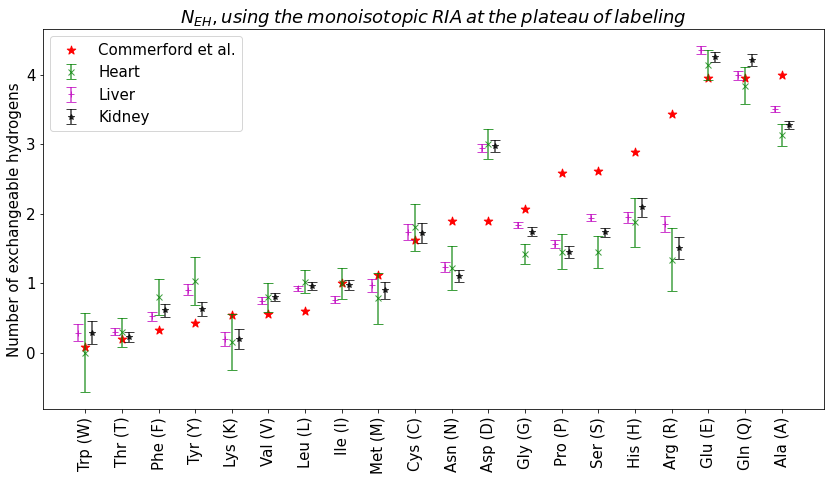

In [10]:
plt.rc('font', size=15) 
plt.figure(figsize=(14,7))
label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
plt.title(r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$")

temp_x=[x-0.5 for x in range(0,80,4)]  
plt.scatter(temp_x, merged['Tritium'],marker='*',s=80, color="r",label='Commerford et al.') 

plt.errorbar(np.array(temp_x),      merged['Asym_NEH_hr'],merged['Asym_NEH_ci_hr'],marker='x', alpha=0.75, color="g", label='Heart',fmt='o',capsize=5) 
plt.errorbar(np.array(temp_x)-0.75, merged['Asym_NEH_lv'],merged['Asym_NEH_ci_lv'],marker='+', alpha=0.75, color="m", label='Liver',fmt='o',capsize=5)    
plt.errorbar(np.array(temp_x)+0.75, merged['Asym_NEH'],merged['Asym_NEH_ci'],   marker='*', alpha=0.75, color="k", label='Kidney',fmt='o',capsize=5)    
plt.xticks([x for x in temp_x],[aa_sh_name[x] for x in merged.symbol],rotation=90)
plt.ylabel("Number of exchangeable hydrogens")    
plt.legend()
plt.show()

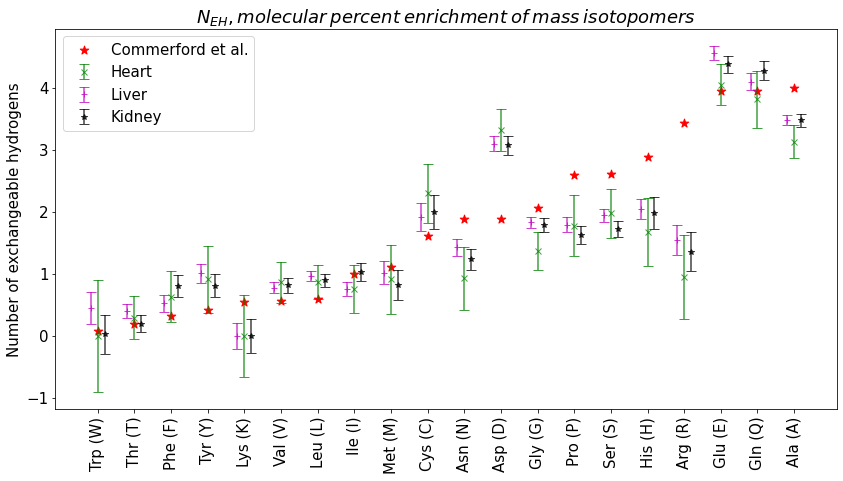

In [11]:
plt.rc('font', size=15) 
plt.figure(figsize=(14,7))
label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
plt.title(r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$")

temp_x=[x-0.5 for x in range(0,80,4)]  
plt.scatter(temp_x, merged['Tritium'],marker='*',s=80, color="r",label='Commerford et al.') 

plt.errorbar(np.array(temp_x),      merged['MPE_hr'],merged['MPE_ci_hr'],marker='x', alpha=0.75, color="g", label='Heart',fmt='o',capsize=5) 
plt.errorbar(np.array(temp_x)-0.75, merged['MPE_lv'],merged['MPE_ci_lv'],marker='+', alpha=0.75, color="m", label='Liver',fmt='o',capsize=5)    
plt.errorbar(np.array(temp_x)+0.75, merged['MPE'],   merged['MPE_ci'],   marker='*', alpha=0.75, color="k", label='Kidney',fmt='o',capsize=5)    
plt.xticks([x for x in temp_x],[aa_sh_name[x] for x in merged.symbol],rotation=90)
plt.ylabel("Number of exchangeable hydrogens")    
plt.legend()
plt.show()

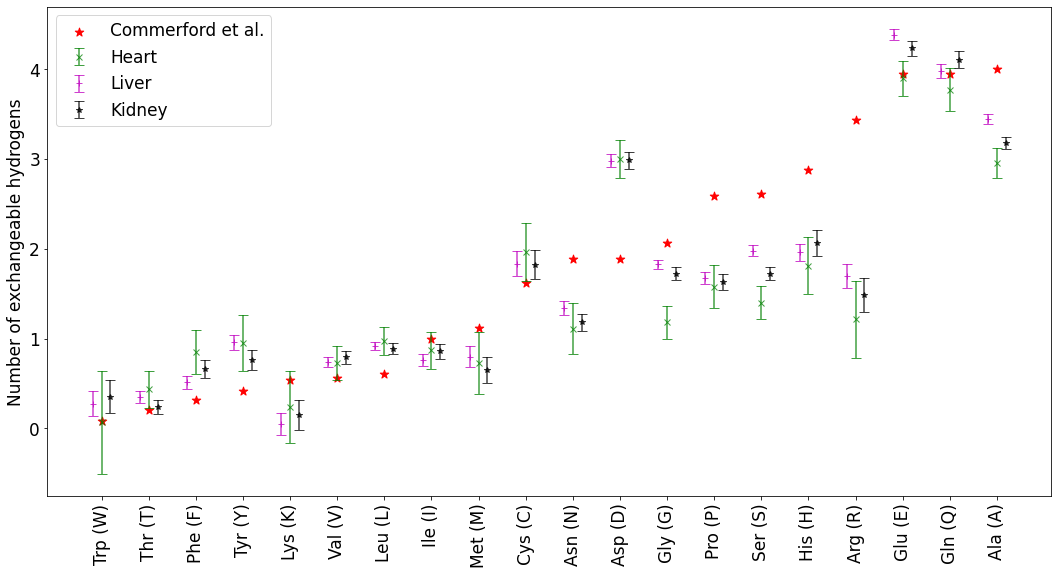

In [12]:
# plt.rc('font', size=15) 
# plt.figure(figsize=(14,7))

plt.rc('font', size=17) 
plt.rc('figure', figsize=(18,9)) 

label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
# plt.title(r"${N_{EH}},\:residual \:sum \:of \:squares$")

temp_x=[x-0.5 for x in range(0,80,4)]  
plt.scatter(temp_x, merged['Tritium'],marker='*',s=80, color="r",label='Commerford et al.') 

plt.errorbar(np.array(temp_x),      merged['APE_hr'],merged['APE_ci_hr'],marker='x', alpha=0.75, color="g", label='Heart',fmt='o',capsize=5) 
plt.errorbar(np.array(temp_x)-0.75, merged['APE_lv'],merged['APE_ci_lv'],marker='+', alpha=0.75, color="m", label='Liver',fmt='o',capsize=5)    
plt.errorbar(np.array(temp_x)+0.75, merged['APE'],   merged['APE_ci'],   marker='*', alpha=0.75, color="k", label='Kidney',fmt='o',capsize=5)    
plt.xticks([x for x in temp_x],[aa_sh_name[x] for x in merged.symbol],rotation=90)
plt.ylabel("Number of exchangeable hydrogens")    
plt.legend()
plt.savefig("LIVER_HEART_KIDNEY_CI.jpeg",dpi=900,bbox_inches='tight')
plt.show()

In [13]:
def get_CI(val,ci):
    return [
        [ x if val[i]-x >0 else val[i] for i,x in enumerate(ci)],
        ci
    ]

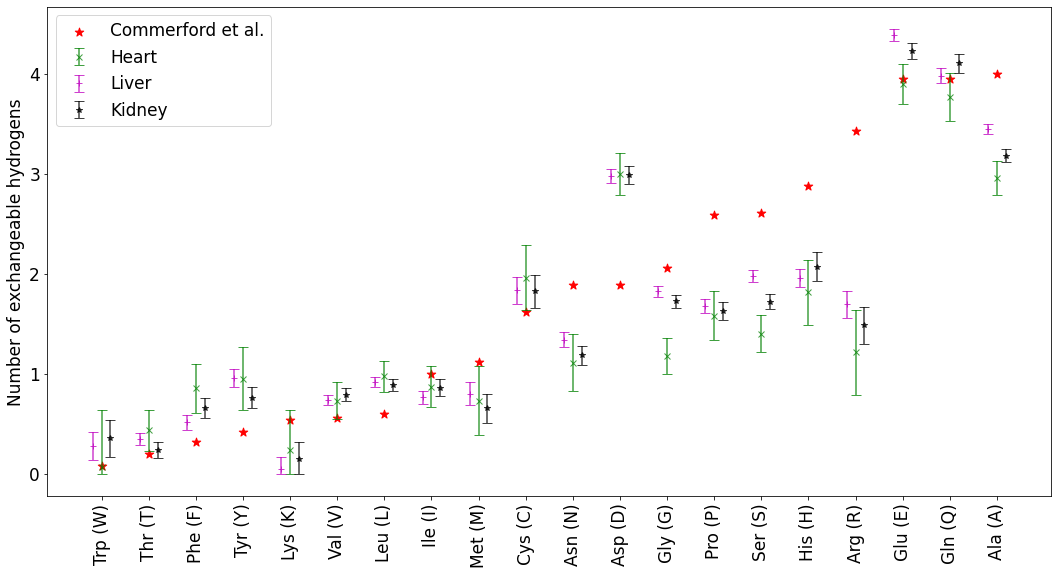

In [14]:
# plt.rc('font', size=15) 
# plt.figure(figsize=(14,7))

plt.rc('font', size=17) 
plt.rc('figure', figsize=(18,9)) 

label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
# plt.title(r"${N_{EH}},\:residual \:sum \:of \:squares$")

temp_x=[x-0.5 for x in range(0,80,4)]  
plt.scatter(temp_x, merged['Tritium'],marker='*',s=80, color="r",label='Commerford et al.') 

plt.errorbar(np.array(temp_x),      merged['APE_hr'],get_CI(merged['APE_hr'],merged['APE_ci_hr']),marker='x', alpha=0.75, color="g", label='Heart',fmt='o',capsize=5) 
plt.errorbar(np.array(temp_x)-0.75, merged['APE_lv'],get_CI(merged['APE_lv'],merged['APE_ci_lv']),marker='+', alpha=0.75, color="m", label='Liver',fmt='o',capsize=5)    
plt.errorbar(np.array(temp_x)+0.75, merged['APE'],   get_CI(merged['APE'],   merged['APE_ci']),   marker='*', alpha=0.75, color="k", label='Kidney',fmt='o',capsize=5)    
plt.xticks([x for x in temp_x],[aa_sh_name[x] for x in merged.symbol],rotation=90)
plt.ylabel("Number of exchangeable hydrogens")    
plt.legend()
# plt.savefig("LIVER_HEART_KIDNEY_CI.jpeg",dpi=900,bbox_inches='tight')
plt.show()